# 약물 효과 예측 인공지능 모델 실습
프로포폴, 레미펜타닐 투여 후 마취 심도(bispectral index) 예측 모델

<a target="_blank" href="https://colab.research.google.com/github/HyeonhoonLee/SNUCM_AI/blob/main/snucm_ai_ppf_bis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 본 프로그램에서 이용할 라이브러리 설치 및 import

In [1]:
!pip install vitaldb

import vitaldb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.5 MB/s eta 0:00:00


# Data loading

##VitalDB Web API를 통해 데이터 로딩


In [2]:
df_trks = pd.read_csv('https://api.vitaldb.net/trks')
df_cases = pd.read_csv("https://api.vitaldb.net/cases")

In [3]:
# Track DataFrame확인    ## .head(), .tail()도 사용가능.
df_trks

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
...,...,...,...
486444,6388,Solar8000/VENT_PIP,2d63adbc7e2653f14348e219816673cde3358cf6
486445,6388,Solar8000/VENT_PPLAT,6f6604255858ddc8f6a01b9f4774b0d43105f6da
486446,6388,Solar8000/VENT_RR,f34f3fae7fd963355c1c7060e1e876d20fa87536
486447,6388,Solar8000/VENT_SET_TV,4a4a55b8aebf9c76a4a76f62a7c1ec6fcb80e618


In [4]:
# Track name 확인
df_trks[df_trks.caseid == 1].tname

## same as..
#df_trks[df_trks['caseid'] == 1]['tname']

0                    BIS/BIS
1               BIS/EEG1_WAV
2               BIS/EEG2_WAV
3                    BIS/EMG
4                    BIS/SEF
               ...          
71      Solar8000/VENT_PPLAT
72         Solar8000/VENT_RR
73    Solar8000/VENT_SET_PCP
74     Solar8000/VENT_SET_TV
75         Solar8000/VENT_TV
Name: tname, Length: 76, dtype: object

In [5]:
# 전체 목록 확인
df_trks[df_trks.caseid == 1].tname.tolist()

##same as,
#print(df_trks[df_trks.caseid == 1].tname.tolist())

['BIS/BIS',
 'BIS/EEG1_WAV',
 'BIS/EEG2_WAV',
 'BIS/EMG',
 'BIS/SEF',
 'BIS/SQI',
 'BIS/SR',
 'BIS/TOTPOW',
 'Primus/AWP',
 'Primus/CO2',
 'Primus/COMPLIANCE',
 'Primus/ETCO2',
 'Primus/EXP_DES',
 'Primus/EXP_SEVO',
 'Primus/FEN2O',
 'Primus/FEO2',
 'Primus/FIN2O',
 'Primus/FIO2',
 'Primus/INCO2',
 'Primus/INSP_DES',
 'Primus/INSP_SEVO',
 'Primus/MAC',
 'Primus/MAWP_MBAR',
 'Primus/MV',
 'Primus/PAMB_MBAR',
 'Primus/PEEP_MBAR',
 'Primus/PIP_MBAR',
 'Primus/PPLAT_MBAR',
 'Primus/RR_CO2',
 'Primus/SET_AGE',
 'Primus/SET_FIO2',
 'Primus/SET_FRESH_FLOW',
 'Primus/SET_INSP_PAUSE',
 'Primus/SET_INSP_TM',
 'Primus/SET_INTER_PEEP',
 'Primus/SET_PIP',
 'Primus/SET_RR_IPPV',
 'Primus/SET_TV_L',
 'Primus/TV',
 'Primus/VENT_LEAK',
 'SNUADC/ART',
 'SNUADC/ECG_II',
 'SNUADC/ECG_V5',
 'SNUADC/PLETH',
 'Solar8000/ART_DBP',
 'Solar8000/ART_MBP',
 'Solar8000/ART_SBP',
 'Solar8000/BT',
 'Solar8000/ETCO2',
 'Solar8000/FEO2',
 'Solar8000/FIO2',
 'Solar8000/GAS2_EXPIRED',
 'Solar8000/GAS2_INSPIRED',
 'Solar

In [6]:
# Cases DataFrame확인
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [7]:
# Cases DataFrame의 column명들만 추출해서 확인
df_cases.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [8]:
# female은 1으로, male 은 0으로 치환
df_cases['sex'] = (df_cases['sex'] == 'F').astype(int)

##Case ID 선택 (inclusion, exclusion criteria)
- 2시간 이상
- 전신 마취
- 18세 이상
- PPF20_VOL, RFTN20_VOL, PPF20_CE, RFTN20_CE, BIS 트랙이 존재
- 몸무게 35 kg 이상

In [9]:
caseids = list(
  set(df_trks.loc[df_trks['tname'] == 'Orchestra/PPF20_VOL', 'caseid']) & ## loc를 사용하는게 아래보다 빠름.
  set(df_trks[df_trks['tname'] == 'Orchestra/RFTN20_VOL']['caseid']) &
  set(df_trks[df_trks['tname'] == 'Orchestra/PPF20_CE']['caseid']) &
  set(df_trks[df_trks['tname'] == 'Orchestra/RFTN20_CE']['caseid']) &
  set(df_trks[df_trks['tname'] == 'BIS/BIS']['caseid']) &
  set(df_cases[df_cases['age'] > 18]['caseid']) &
  set(df_cases[df_cases['weight'] > 35]['caseid']) &
  set(df_cases[df_cases['caseend'] > 7200]['caseid']) &   ## 2시간 이상의 수술.
  set(df_cases[df_cases['ane_type'] == 'General']['caseid'])  ## 전신 마취
  )
np.random.shuffle(caseids)

In [10]:
print(f'Included cases numeber: {len(caseids)}')

Included cases numeber: 2225


# 데이터 전처리


## 하나의 Caseid로 먼저 실습

In [11]:
caseid = 5180 #5180

In [12]:
# 20초 간격으로 Propofol 및 BIS 데이터 추출
tracknames = ['Orchestra/PPF20_VOL', 'BIS/BIS']
vals = vitaldb.load_case(caseid, tracknames, 20)

print(vals.shape) # Matrix shape 확인
print()
print(vals[:10]) # 데이터 일부 확인

(888, 2)

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 2.38199997  0.        ]
 [ 3.97900009  0.        ]
 [ 3.97900009 75.40000153]
 [ 3.97900009 60.90000153]
 [ 3.97900009 43.59999847]
 [ 4.0710001  44.20000076]
 [ 4.3039999  44.5       ]]


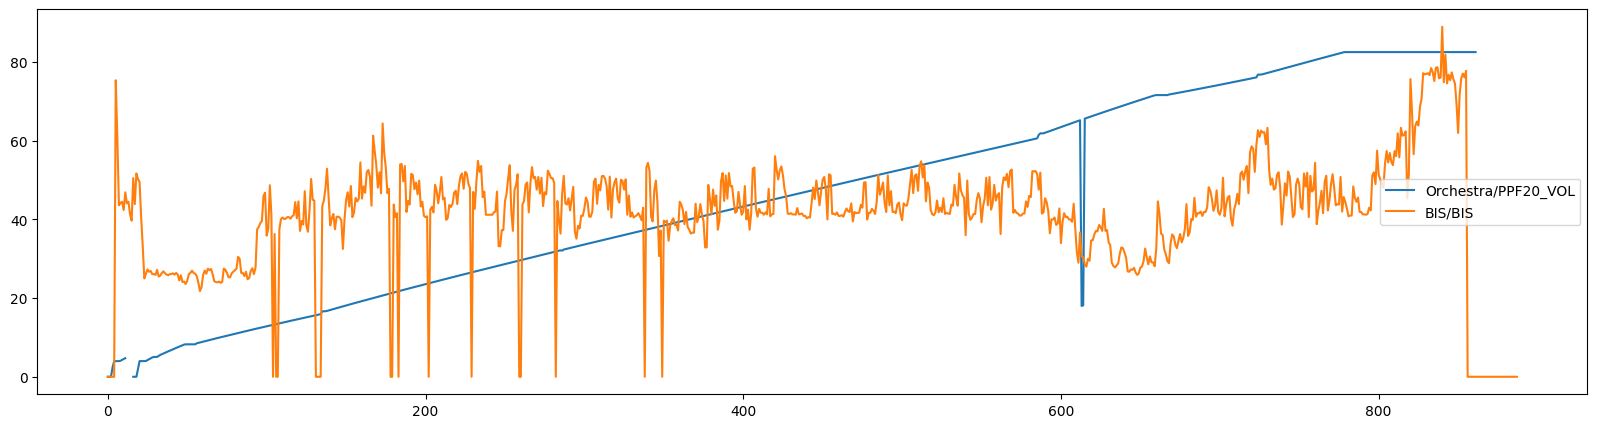

In [13]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
for idx, trk in enumerate(tracknames):
  plt.plot(vals[:,idx],label=trk)
plt.legend(loc='center right')
plt.show()

In [14]:
# 결측치 확인
print(np.isnan(vals).sum(axis=0)) # track
print()
np.where(np.isnan(vals).sum(axis=1) > 0)[0] #time

[30  0]



array([ 12,  13,  14,  15, 862, 863, 864, 865, 866, 867, 868, 869, 870,
       871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883,
       884, 885, 886, 887])

In [15]:
# track - time별 결측치 확인
for idx, trk in enumerate(tracknames):
  print(f' Missing values of {trk} track at : {np.where(np.isnan(vals[:, idx]))[0]}')
  print()

 Missing values of Orchestra/PPF20_VOL track at : [ 12  13  14  15 862 863 864 865 866 867 868 869 870 871 872 873 874 875
 876 877 878 879 880 881 882 883 884 885 886 887]

 Missing values of BIS/BIS track at : []



In [16]:
#  결측치 처리 방법1 - 전후 값으로 치환
vals_ = vals[10:20]
print("#"*4, "Original", "#"*4)
print(vals_)
print()
print("#"*4, "Forward filling", "#"*4)
print(pd.DataFrame(vals_).fillna(method='ffill').values)
print()
print("#"*4, "Backward filling", "#"*4)
print(pd.DataFrame(vals_).fillna(method='bfill').values)
print()
#  결측치 처리 방법2 - 전후 값으로 치환
print("#"*4, "Interpolation", "#"*4)
print(pd.DataFrame(vals_).interpolate().values)


#### Original ####
[[ 4.52199984 42.40000153]
 [ 4.71899986 46.90000153]
 [        nan 44.09999847]
 [        nan 44.5       ]
 [        nan 41.29999924]
 [        nan 39.70000076]
 [ 0.         50.5       ]
 [ 0.         43.90000153]
 [ 0.         51.70000076]
 [ 1.93900001 50.29999924]]

#### Forward filling ####
[[ 4.52199984 42.40000153]
 [ 4.71899986 46.90000153]
 [ 4.71899986 44.09999847]
 [ 4.71899986 44.5       ]
 [ 4.71899986 41.29999924]
 [ 4.71899986 39.70000076]
 [ 0.         50.5       ]
 [ 0.         43.90000153]
 [ 0.         51.70000076]
 [ 1.93900001 50.29999924]]

#### Backward filling ####
[[ 4.52199984 42.40000153]
 [ 4.71899986 46.90000153]
 [ 0.         44.09999847]
 [ 0.         44.5       ]
 [ 0.         41.29999924]
 [ 0.         39.70000076]
 [ 0.         50.5       ]
 [ 0.         43.90000153]
 [ 0.         51.70000076]
 [ 1.93900001 50.29999924]]

#### Interpolation ####
[[ 4.52199984 42.40000153]
 [ 4.71899986 46.90000153]
 [ 3.77519989 44.09999847]
 [ 2.83

In [17]:
#  결측치 처리 방법3 - 특정값으로 치환
print(np.nan_to_num(vals_, 0))

[[ 4.52199984 42.40000153]
 [ 4.71899986 46.90000153]
 [ 0.         44.09999847]
 [ 0.         44.5       ]
 [ 0.         41.29999924]
 [ 0.         39.70000076]
 [ 0.         50.5       ]
 [ 0.         43.90000153]
 [ 0.         51.70000076]
 [ 1.93900001 50.29999924]]


## 전체 실행 (TODO)
- dataset을 담을 변수를 설정
- propofol(ppf20), remifentanil(rftn20), bis를 로딩한다
- 기록된 데이터가 짧거나, drug infusion이 실제 없었던 케이스, bis값이 적절하지 않은 케이스는 거르기
- 결측값 및 음수 처리

In [18]:
######### TODO 1 #########

# vital 파일로부터 dataset 을 만듬
x_ppf_dose = []  # 각 레코드의 프로포폴 주입량
x_rft_dose = []  # 각 레코드의 레미펜타닐 주입량
x_aswh = []  # 각 레코드의 나이, 성별, 키, 몸무게
x_caseid = []  # 각 레코드의 caseid
y = []  # 각 레코드의 출력값 (bis)
y_old = []  # 고전적 모델의 예측값

LSTM_TIMEPOINTS = 180
MAX_CASES = 50  # 본 예제에서 사용할 최대 case 수

# 데이터 로딩했을 때 컬럼 순서
PPF_DOSE = 0
RFT_DOSE = 1
PPF_CE = 2
RFT_CE = 3
BIS = 4

icase = 0  # 현재 로딩 중인 케이스 번호
ncase = min(MAX_CASES, len(caseids))
for caseid in caseids:  # 본 연구에 사용할 각 case에 대하여
    print('loading {} ({}/{})'.format(caseid, icase, ncase), end='...', flush=True)

    ######### TODO 1 : Step 1 #########
    # 10초 간격으로, propofol volume, remifentanil volume, propofol CE, remifentanil CE, BIS 데이터 추출
    vals = vitaldb.load_case(caseid, ['Orchestra/PPF20_VOL', 'Orchestra/RFTN20_VOL', 'Orchestra/PPF20_CE', 'Orchestra/RFTN20_CE', 'BIS/BIS'], 10)

    ######### TODO 1 : Step 2 #########
    # 결측값은 측정된 마지막 값으로 대체
    vals = pd.DataFrame(vals).fillna(method='ffill').values

    ######### TODO 1 : Step 3 #########
    # 마지막 남은 맨 앞 쪽 결측값은 0으로 대체
    vals = np.nan_to_num(vals, 0)

    # drug 주입을 하지 않은 case 혹은 bis를 사용하지 않은 case는 제외
    if (np.max(vals, axis=0) <= 1).any():
        print('no drug infusion or bis')
        continue

    # drug infusion 시작 시간을 구하고 그 이전을 삭제
    first_ppf_idx = np.where(vals[:, PPF_DOSE] > 1)[0][0]
    first_rft_idx = np.where(vals[:, RFT_DOSE] > 1)[0][0]
    first_drug_idx = min(first_ppf_idx, first_rft_idx)
    vals = vals[first_drug_idx:, :]

    # volume 을 rate로 변경
    vals[1:, PPF_DOSE] -= vals[:-1, PPF_DOSE]
    vals[1:, RFT_DOSE] -= vals[:-1, RFT_DOSE]
    vals[0, PPF_DOSE] = 0
    vals[0, RFT_DOSE] = 0

    ######### TODO 1 : Step 4 #########
    # 음수 값을 0으로 대체
    vals[vals < 0] = 0

    # bis 값의 첫 값이 80 이하이거나 마지막 값이 70 이하인 case는 사용하지 않음
    valid_bis_idx = np.where(vals[:, BIS] > 0)[0]
    first_bis_idx = valid_bis_idx[0]
    last_bis_idx = valid_bis_idx[-1]
    if vals[first_bis_idx, BIS] < 80:
        print('first bis < 80')
        continue
    if vals[last_bis_idx, BIS] < 70:
        print('last bis < 70')
        continue

    # infusion 시작 전 LSTM_TIMEPOINTS 동안의 dose와 bis를 모두 0으로 세팅
    vals = np.vstack((np.zeros((LSTM_TIMEPOINTS - 1, vals.shape[1])), vals))

    ######### TODO 1 : Step 5 #########
    # 현 case의 나이, 성별, 키, 몸무게를 가져옴
    aswh = df_cases.loc[df_cases['caseid'] == caseid, ['age','sex','weight','height']]
    aswh = aswh.values.astype(float).flatten()

    # case 시작 부터 종료까지 dataset 에 넣음
    for irow in range(1, vals.shape[0] - LSTM_TIMEPOINTS - 1):
        bis = vals[irow + LSTM_TIMEPOINTS, BIS]
        if bis == 0:
            continue

        # 데이터셋에 입력값을 넣음
        x_ppf_dose.append(vals[irow:irow + LSTM_TIMEPOINTS, PPF_DOSE])
        x_rft_dose.append(vals[irow:irow + LSTM_TIMEPOINTS, RFT_DOSE])

        x_aswh.append(aswh)
        x_caseid.append(caseid)
        y.append(bis / 100)

        ppf_ce = vals[irow + LSTM_TIMEPOINTS, PPF_CE]
        rft_ce = vals[irow + LSTM_TIMEPOINTS, RFT_CE]

        ug = (ppf_ce / 4.47 + rft_ce / 19.3)**1.43
        y_old.append(0.98 - 0.98 * (ug / (1 + ug)))


    # 사용할 case
    print('done')
    icase += 1
    if icase >= ncase:
        break


loading 5115 (0/50)...done
loading 636 (1/50)...first bis < 80
loading 5784 (1/50)...done
loading 4595 (2/50)...done
loading 1974 (3/50)...done
loading 3686 (4/50)...done
loading 3579 (5/50)...done
loading 4039 (6/50)...done
loading 5270 (7/50)...done
loading 5469 (8/50)...first bis < 80
loading 3172 (8/50)...done
loading 5777 (9/50)...done
loading 4078 (10/50)...done
loading 756 (11/50)...done
loading 512 (12/50)...first bis < 80
loading 295 (12/50)...last bis < 70
loading 3902 (12/50)...done
loading 3565 (13/50)...done
loading 6152 (14/50)...done
loading 2975 (15/50)...last bis < 70
loading 4713 (15/50)...done
loading 5346 (16/50)...last bis < 70
loading 4589 (16/50)...done
loading 1201 (17/50)...done
loading 5511 (18/50)...done
loading 5546 (19/50)...done
loading 1742 (20/50)...done
loading 3554 (21/50)...done
loading 1092 (22/50)...done
loading 4745 (23/50)...done
loading 4453 (24/50)...done
loading 3367 (25/50)...done
loading 2326 (26/50)...first bis < 80
loading 1920 (26/50)...do

## 데이터셋 포맷 및 차원 변환

In [19]:
# 입력 데이터셋을 numpy array로 변경
x_ppf_dose = np.array(x_ppf_dose)[..., None]  # LSTM 에 넣기 위해서는 3차원이어야 한다. 마지막 차원을 추가
x_rft_dose = np.array(x_rft_dose)[..., None]
x_aswh = np.array(x_aswh)
y = np.array(y)
y_old = np.array(y_old)
x_caseid = np.array(x_caseid)

# 최종적으로 로딩 된 caseid
caseids = np.unique(x_caseid)

# normalize data
x_aswh = (x_aswh - np.mean(x_aswh, axis=0)) / np.std(x_aswh, axis=0)


## 데이터를 학습(train)과 테스트(test)로 나누기

In [20]:
# train, test case로 나눔
ntest = int(ncase * 0.1)
ntrain = ncase - ntest
train_caseids = caseids[:ntrain]
test_caseids = caseids[ntrain:ncase]

# train set과 test set 으로 나눔
train_mask = np.array([caseid in train_caseids for caseid in x_caseid])
test_mask = np.array([caseid in test_caseids for caseid in x_caseid])
x_train = [x_ppf_dose[train_mask], x_rft_dose[train_mask], x_aswh[train_mask]]
y_train = y[train_mask]
x_test = [x_ppf_dose[test_mask], x_rft_dose[test_mask], x_aswh[test_mask]]
y_test = y[test_mask]
y_old = y_old[test_mask]

print('train: {} cases {} samples, testing: {} cases {} samples'.format(len(train_caseids), np.sum(train_mask), len(test_caseids), np.sum(test_mask)))

train: 45 cases 50348 samples, testing: 5 cases 5408 samples


# Model building


In [21]:
from keras.models import Model, load_model
from keras.layers import Dense, Dropout, LSTM, Input, concatenate
from keras.callbacks import EarlyStopping
import tensorflow as tf

# 모델 설계

def build_model(LSTM_NODES, FNN_NODES, DROP_RATE):

    input_cov = Input(batch_shape=(None, 4))
    input_ppf = Input(batch_shape=(None, LSTM_TIMEPOINTS, 1))
    input_rft = Input(batch_shape=(None, LSTM_TIMEPOINTS, 1))
    output_ppf = LSTM(LSTM_NODES, input_shape=(LSTM_TIMEPOINTS, 1), activation='tanh')(input_ppf)
    output_rft = LSTM(LSTM_NODES, input_shape=(LSTM_TIMEPOINTS, 1), activation='tanh')(input_rft)
    output = concatenate([output_ppf, output_rft, input_cov])
    output = Dense(FNN_NODES)(output)
    output = Dropout(DROP_RATE)(output)
    output = Dense(1, activation='sigmoid')(output)
    model = Model(inputs=[input_ppf, input_rft, input_cov], outputs=[output])

    return model


In [22]:
# 모델 생성 및 구조 확인
model = build_model(32, 32, 0.5)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 180, 1)]             0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 180, 1)]             0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 32)                   4352      ['input_2[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 32)                   4352      ['input_3[0][0]']             
                                                                                              

In [23]:
mse = tf.keras.losses.MeanSquaredError()
mape = tf.keras.losses.MeanAbsolutePercentageError()

model.compile(loss=mse, optimizer='sgd', metrics=[mape])
hist = model.fit(x_train, y_train,
                 batch_size=64,
                 validation_split=0.2,
                 epochs=1,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')])

630/630 [==============================] - 21s 16ms/step - loss: 0.0230 - mean_absolute_percentage_error: 27.8171 - val_loss: 0.0160 - val_mean_absolute_percentage_error: 28.3936


# 결과 출력

169/169 [==============================] - 2s 6ms/step
Test MAPE (LSTM): 19.3%
Test MAPE (Short): 19.4%

CaseID 6078, LSTM MAPE=14.519458770751953, Short MAPE=16.89963484434376


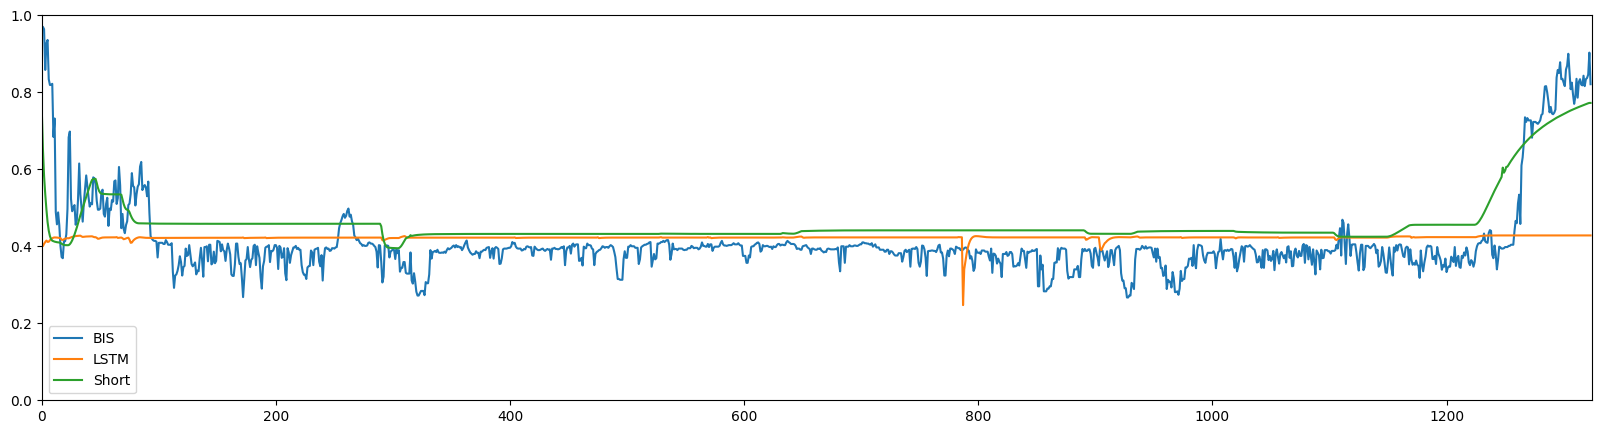

CaseID 6111, LSTM MAPE=19.8736515045166, Short MAPE=22.68583468082977


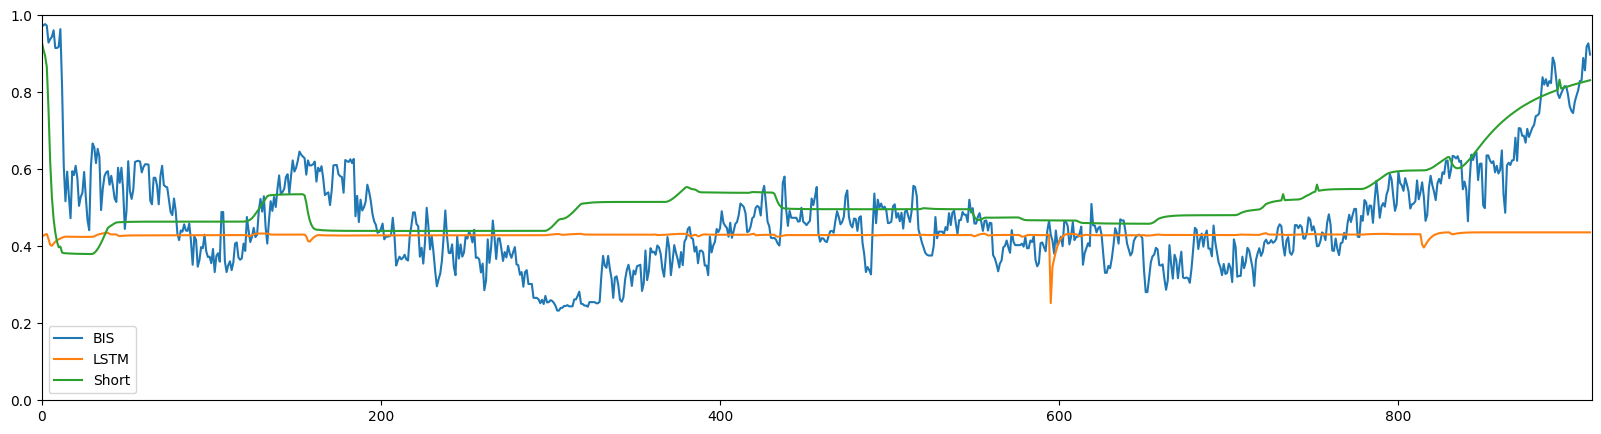

CaseID 6152, LSTM MAPE=17.73448944091797, Short MAPE=38.26313902907976


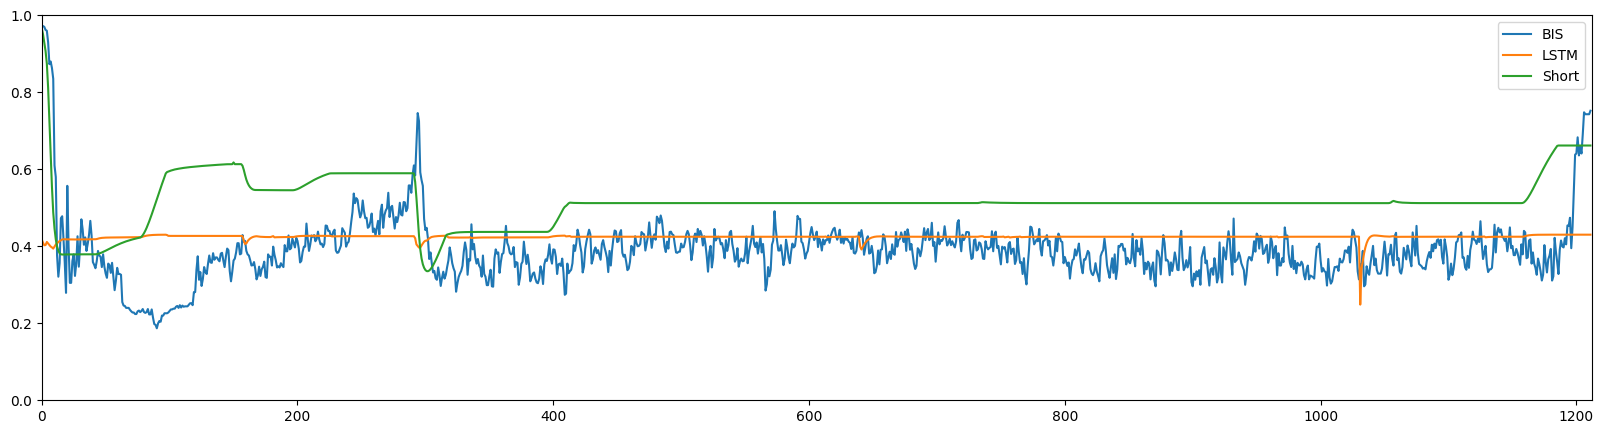

CaseID 6190, LSTM MAPE=23.88312339782715, Short MAPE=21.516928826312327


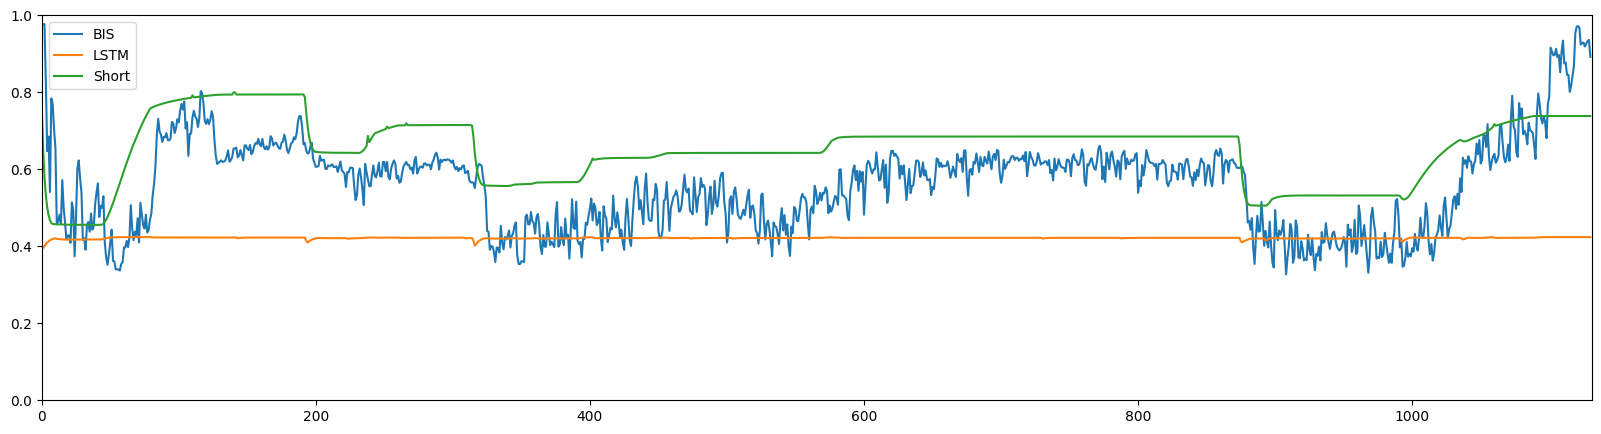

CaseID 6364, LSTM MAPE=22.338733673095703, Short MAPE=34.03906194678576


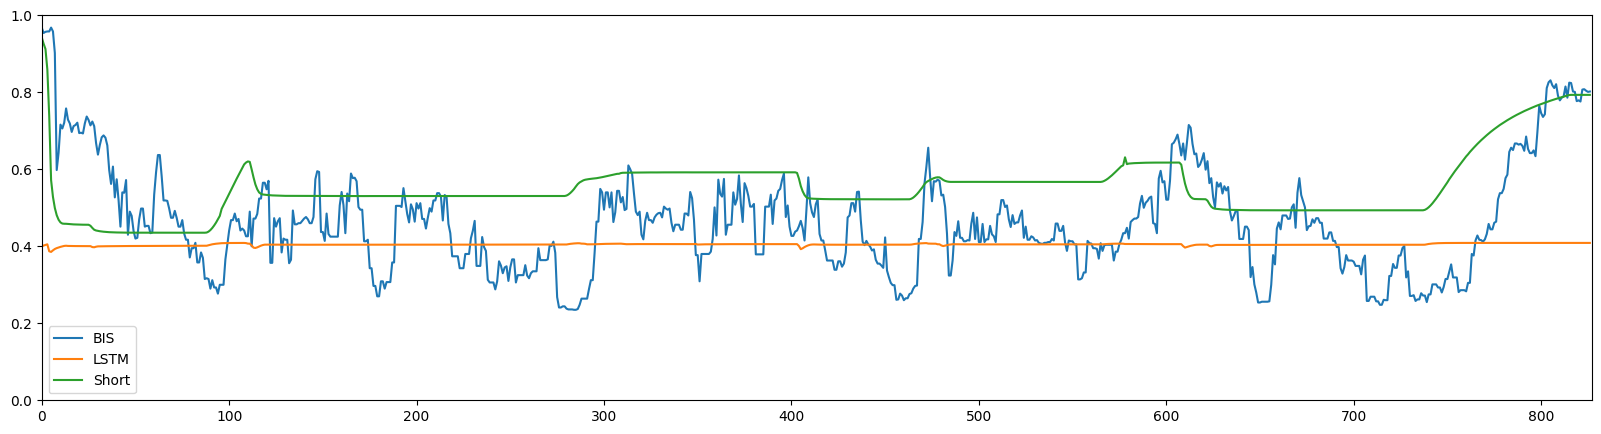

In [24]:
# 예측
y_pred = model.predict(x_test).flatten()
print(f"Test MAPE (LSTM): {mape(y_test, y_pred):.1f}%")
print(f"Test MAPE (Short): {mape(y_old, y_pred):.1f}%")
print()

# 각 case에서 예측 결과를 그림으로 확인
import matplotlib.pyplot as plt
for caseid in test_caseids:
    case_mask = (x_caseid[test_mask] == caseid)
    case_len = np.sum(case_mask)
    if case_len == 0:
        continue

    print('CaseID {}, LSTM MAPE={}, Short MAPE={}'.format(caseid,
      mape(y_test[case_mask], y_pred[case_mask]),
      mape(y_test[case_mask], y_old[case_mask])
      ))

    t = np.arange(0, case_len)
    plt.figure(figsize=(20, 5))
    plt.plot(t, y_test[case_mask], label='BIS')  # 측정 결과
    plt.plot(t, y_pred[case_mask], label='LSTM')  # LSTM model
    plt.plot(t, y_old[case_mask], label='Short')  # Short model
    plt.legend()
    plt.xlim([0, case_len])
    plt.ylim([0, 1])
    plt.show()

# 모델 학습 및 추론 (TODO)

In [25]:
######### TODO 2 #########
# 모델 설계 및 학습

######### TODO 2 : Step 1 #########
# LSTM의 node 수 8, FNN의 node 수 16, dropout rate는 0.2인 모델을 만들어주세요.
model = build_model(8, 16, 0.2)

######### TODO 2 : Step 2 #########
# 손실함수는 mean absolute error, 옵티마이저는 Adam, 평가방법은 mean absolute percentage error로 모델을 컴파일 해주세요.
mae = tf.keras.losses.MeanAbsoluteError()
mape = tf.keras.losses.MeanAbsolutePercentageError()
model.compile(loss=mae, optimizer='adam', metrics=[mape])

######### TODO 2 : Step 3 #########
# 모델 검증을 위해 10%로 split해서 미니배치 크기는 256으로 모델을 epoch은 10회로 학습해주세요.
hist = model.fit(x_train, y_train,
                 validation_split=0.1,
                 epochs=10,
                 batch_size=256)


Epoch 1/10
178/178 [==============================] - 7s 19ms/step - loss: 0.1061 - mean_absolute_percentage_error: 24.2450 - val_loss: 0.0834 - val_mean_absolute_percentage_error: 24.3369
Epoch 2/10
178/178 [==============================] - 3s 15ms/step - loss: 0.0907 - mean_absolute_percentage_error: 20.7139 - val_loss: 0.0755 - val_mean_absolute_percentage_error: 22.0045
Epoch 3/10
178/178 [==============================] - 3s 17ms/step - loss: 0.0790 - mean_absolute_percentage_error: 18.5841 - val_loss: 0.0735 - val_mean_absolute_percentage_error: 21.3440
Epoch 4/10
178/178 [==============================] - 2s 13ms/step - loss: 0.0765 - mean_absolute_percentage_error: 17.9534 - val_loss: 0.0736 - val_mean_absolute_percentage_error: 21.3584
Epoch 5/10
178/178 [==============================] - 2s 13ms/step - loss: 0.0758 - mean_absolute_percentage_error: 18.0290 - val_loss: 0.0731 - val_mean_absolute_percentage_error: 21.2672
Epoch 6/10
178/178 [==============================] - 2

169/169 [==============================] - 2s 7ms/step
Test MAPE (LSTM): 15.0%
Test MAPE (Short): 20.6%

CaseID 6078, LSTM MAPE=8.646475791931152, Short MAPE=16.89963484434376


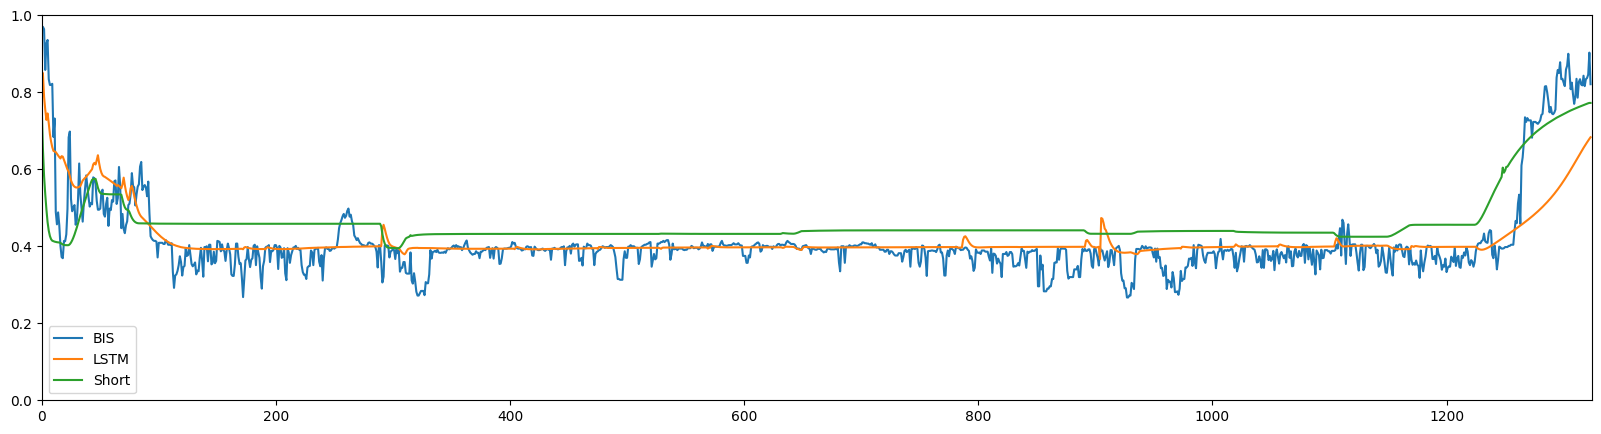

CaseID 6111, LSTM MAPE=17.23810386657715, Short MAPE=22.68583468082977


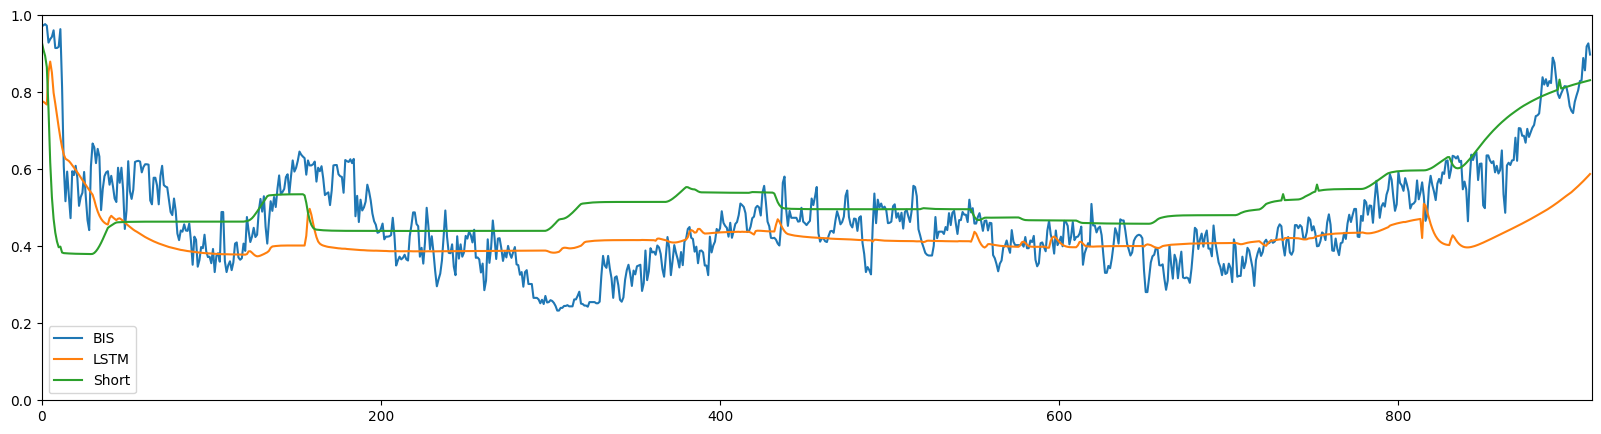

CaseID 6152, LSTM MAPE=15.5337495803833, Short MAPE=38.26313902907976


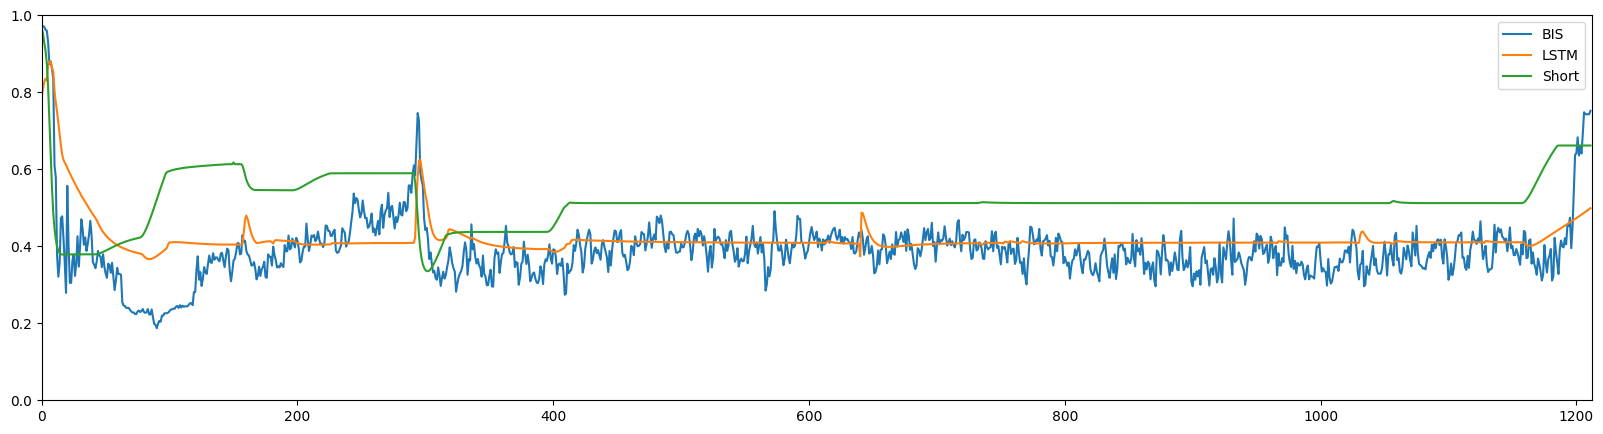

CaseID 6190, LSTM MAPE=17.599735260009766, Short MAPE=21.516928826312327


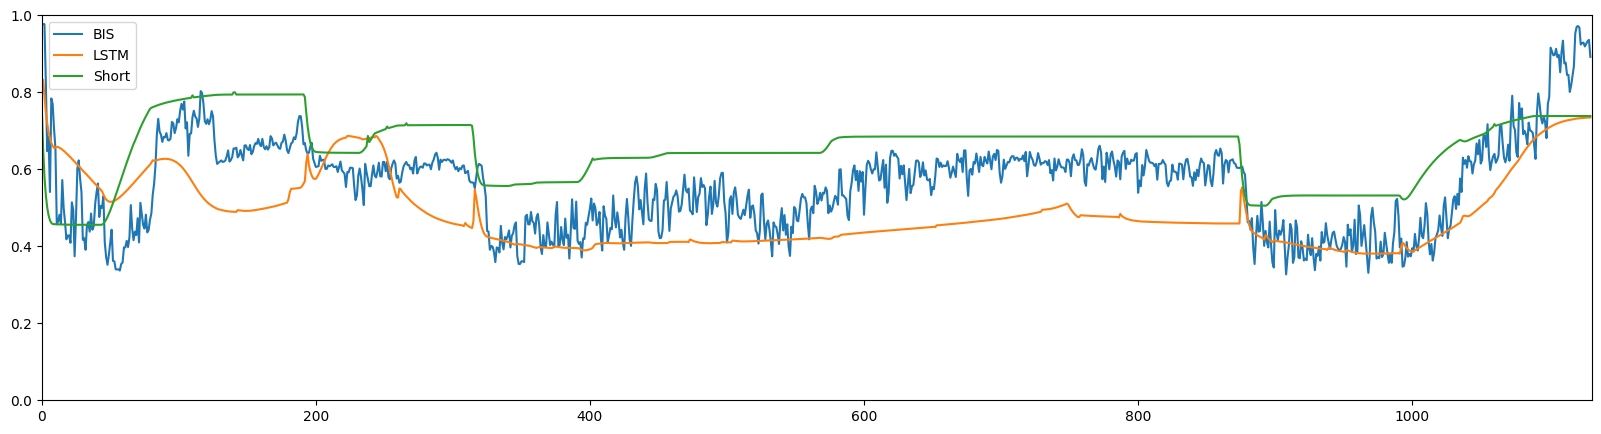

CaseID 6364, LSTM MAPE=18.612272262573242, Short MAPE=34.03906194678576


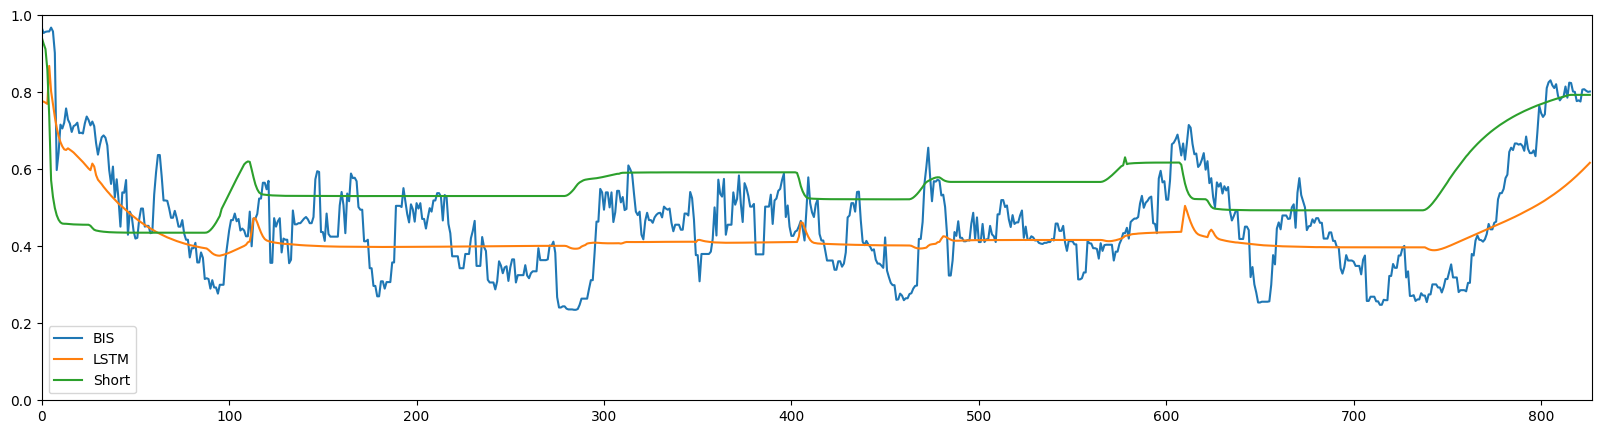

In [26]:
# 예측
y_pred = model.predict(x_test).flatten()
print(f"Test MAPE (LSTM): {mape(y_test, y_pred):.1f}%")
print(f"Test MAPE (Short): {mape(y_old, y_pred):.1f}%")
print()

# 각 case에서 예측 결과를 그림으로 확인
import matplotlib.pyplot as plt
for caseid in test_caseids:
    case_mask = (x_caseid[test_mask] == caseid)
    case_len = np.sum(case_mask)
    if case_len == 0:
        continue

    print('CaseID {}, LSTM MAPE={}, Short MAPE={}'.format(caseid,
      mape(y_test[case_mask], y_pred[case_mask]),
      mape(y_test[case_mask], y_old[case_mask])
      ))

    t = np.arange(0, case_len)
    plt.figure(figsize=(20, 5))
    plt.plot(t, y_test[case_mask], label='BIS')  # 측정 결과
    plt.plot(t, y_pred[case_mask], label='LSTM')  # LSTM model
    plt.plot(t, y_old[case_mask], label='Short')  # Short model
    plt.legend()
    plt.xlim([0, case_len])
    plt.ylim([0, 1])
    plt.show()